# Data Preprocessing

In [1]:
%ls

data_preprocessing.ipynb  src/


In [2]:
%cd ../data_loader/src

/Users/socratis/PycharmProjects/intern_task_VK/data_loader/src


In [3]:
%ls

__pycache__/    data_loader.py


In [4]:
from data_loader import DataLoader

data_loader = DataLoader()
df = data_loader.load_data()

# Удалим ненужные кластеры переменных

In [5]:
df.shape

(235258, 146)

In [6]:
clusters_to_remove = ['feature_' + str(i) for i in range(110, 126)] + ['feature_' + str(i) for i in range (15,21)]
df_cleaned = df.drop(columns=clusters_to_remove)
df_cleaned


,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
0,0,10,1.0,0.0,1.0,3.0,3.0,0.333333,0.0,0.333333,...,0.0,0.000000,0.454545,0.890238,8.655534,1.000000,0.077778,0.002222,1.0,0.333333
1,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.773976,23.130514,0.000000,0.027826,0.000430,44.0,14.666667
2,0,10,3.0,0.0,2.0,0.0,3.0,1.000000,0.0,0.666667,...,0.0,0.000000,0.000000,0.918308,13.351339,0.000000,0.014925,0.000104,22.0,7.333333
3,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.975355,18.240926,0.000000,0.053140,0.000255,8.0,2.666667
4,2,10,3.0,0.0,3.0,1.0,3.0,1.000000,0.0,1.000000,...,273.0,79.670665,0.200000,0.990119,31.786048,0.333333,0.046512,0.000307,24.0,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235253,2,29995,1.0,0.0,0.0,0.0,1.0,0.500000,0.0,0.000000,...,0.0,0.000000,0.000000,0.471409,0.000000,0.000000,0.001350,0.000002,3.0,1.500000
235254,2,29995,1.0,0.0,1.0,0.0,1.0,0.500000,0.0,0.500000,...,0.0,0.000000,0.000000,0.471409,39.908056,0.000000,0.004850,0.000014,9.0,4.500000
235255,1,29995,1.0,0.0,0.0,0.0,1.0,0.500000,0.0,0.000000,...,0.0,0.000000,0.000000,0.471409,0.000000,0.000000,0.001064,0.000001,1.0,0.500000
235256,2,29995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [7]:
df_cleaned.shape

(235258, 124)

# Стандартизация и масштабирование данных

#### Стандартизация

In [8]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

features_to_standard = [col for col in df_cleaned.columns if col not in ['rank', 'query_id']]

st_scaler = StandardScaler().fit(df_cleaned[features_to_standard])
st_scaler

StandardScaler()

In [9]:
st_scaler.mean_

array([1.91196049e+00, 2.06233157e-01, 1.18984689e+00, 5.50272467e-01,
       1.96008212e+00, 8.03964145e-01, 9.75574682e-02, 5.41173888e-01,
       5.00000000e+02, 8.34908860e-01, 6.63542035e+02, 1.52614151e+00,
       8.41180321e+00, 7.92130767e+00, 6.81401287e+02, 3.18977463e-01,
       1.50396586e+00, 5.91023472e-01, 2.48718768e+01, 5.39267528e+00,
       9.24984485e-02, 4.45153831e-01, 1.93510954e-01, 6.19438659e+00,
       1.46471533e+01, 2.20447339e-01, 9.38760850e-01, 4.33307263e-01,
       1.61313834e+01, 1.00000000e+06, 1.52372554e-01, 6.80874440e-01,
       3.01734323e-01, 1.06953598e+01, 1.01591318e+02, 9.37693175e-02,
       3.72950148e-01, 6.27728093e-02, 1.08727028e+02, 5.05999851e-02,
       6.84534285e-02, 2.29321073e-01, 5.99681234e+00, 5.55893083e-02,
       1.58457988e-02, 2.18622906e-02, 7.94866724e-02, 2.56176368e-02,
       1.83161838e-02, 3.32873172e-02, 5.10929110e-02, 1.49757769e-01,
       5.38883213e-02, 3.68722498e-02, 2.40095197e-02, 3.50995929e-02,
      

In [10]:
df_cleaned_scaled = st_scaler.transform(df_cleaned[features_to_standard])
df_cleaned_scaled = pd.DataFrame(StandardScaler().fit_transform(df_cleaned[features_to_standard]), columns = df_cleaned[features_to_standard].columns)

In [11]:
if 'rank' in df_cleaned_scaled.columns:
    df_cleaned_scaled.drop('rank', axis=1, inplace=True)
if 'query_id' in df_cleaned_scaled.columns:
    df_cleaned_scaled.drop('query_id', axis=1, inplace=True)

# Добавим столбцы rank и query_id в начало
df_cleaned_scaled.insert(0, 'rank', df_cleaned['rank'])
df_cleaned_scaled.insert(1, 'query_id', df_cleaned['query_id'])

df_cleaned_scaled

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
0,0,10,-0.737015,-0.356135,-0.183032,3.097217,0.864056,-1.384395,-0.36671,-0.494892,...,-0.024367,-0.00395,3.814976,0.423834,-0.157295,1.831865,1.521570,0.935567,-0.336817,-0.643119
1,1,10,0.879315,-0.356135,1.745178,-0.695715,0.864056,0.576653,-0.36671,1.092516,...,-0.024367,-0.00395,-0.697956,0.094293,0.786510,-0.718582,0.023786,0.077291,0.338139,0.355905
2,0,10,0.879315,-0.356135,0.781073,-0.695715,0.864056,0.576653,-0.36671,0.298813,...,-0.024367,-0.00395,-0.697956,0.503398,0.148883,-0.718582,-0.363043,-0.078846,-0.007188,-0.155224
3,1,10,0.879315,-0.356135,1.745178,-0.695715,0.864056,0.576653,-0.36671,1.092516,...,-0.024367,-0.00395,-0.697956,0.665096,0.467696,-0.718582,0.782813,-0.006525,-0.226941,-0.480487
4,2,10,0.879315,-0.356135,1.745178,0.568595,0.864056,0.576653,-0.36671,1.092516,...,-0.010402,-0.00392,1.287736,0.706945,1.350873,0.131566,0.584076,0.018381,0.024206,-0.108757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235253,2,29995,-0.737015,-0.356135,-1.147138,-0.695715,-0.797721,-0.894132,-0.36671,-1.288596,...,-0.024367,-0.00395,-0.697956,-0.763326,-0.721658,-0.718582,-0.770082,-0.127699,-0.305424,-0.561803
235254,2,29995,-0.737015,-0.356135,-0.183032,-0.695715,-0.797721,-0.894132,-0.36671,-0.098040,...,-0.024367,-0.00395,-0.697956,-0.763326,1.880448,-0.718582,-0.665137,-0.121951,-0.211244,-0.352705
235255,1,29995,-0.737015,-0.356135,-1.147138,-0.695715,-0.797721,-0.894132,-0.36671,-1.288596,...,-0.024367,-0.00395,-0.697956,-0.763326,-0.721658,-0.718582,-0.778658,-0.128177,-0.336817,-0.631502
235256,2,29995,-1.545180,-0.356135,-1.147138,-0.695715,-1.628610,-2.364918,-0.36671,-1.288596,...,-0.024367,-0.00395,-0.697956,-2.099523,-0.721658,-0.718582,-0.810561,-0.128656,-0.352514,-0.666352


# Удалим выбросы

In [12]:
df_cleaned_scaled

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
0,0,10,-0.737015,-0.356135,-0.183032,3.097217,0.864056,-1.384395,-0.36671,-0.494892,...,-0.024367,-0.00395,3.814976,0.423834,-0.157295,1.831865,1.521570,0.935567,-0.336817,-0.643119
1,1,10,0.879315,-0.356135,1.745178,-0.695715,0.864056,0.576653,-0.36671,1.092516,...,-0.024367,-0.00395,-0.697956,0.094293,0.786510,-0.718582,0.023786,0.077291,0.338139,0.355905
2,0,10,0.879315,-0.356135,0.781073,-0.695715,0.864056,0.576653,-0.36671,0.298813,...,-0.024367,-0.00395,-0.697956,0.503398,0.148883,-0.718582,-0.363043,-0.078846,-0.007188,-0.155224
3,1,10,0.879315,-0.356135,1.745178,-0.695715,0.864056,0.576653,-0.36671,1.092516,...,-0.024367,-0.00395,-0.697956,0.665096,0.467696,-0.718582,0.782813,-0.006525,-0.226941,-0.480487
4,2,10,0.879315,-0.356135,1.745178,0.568595,0.864056,0.576653,-0.36671,1.092516,...,-0.010402,-0.00392,1.287736,0.706945,1.350873,0.131566,0.584076,0.018381,0.024206,-0.108757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235253,2,29995,-0.737015,-0.356135,-1.147138,-0.695715,-0.797721,-0.894132,-0.36671,-1.288596,...,-0.024367,-0.00395,-0.697956,-0.763326,-0.721658,-0.718582,-0.770082,-0.127699,-0.305424,-0.561803
235254,2,29995,-0.737015,-0.356135,-0.183032,-0.695715,-0.797721,-0.894132,-0.36671,-0.098040,...,-0.024367,-0.00395,-0.697956,-0.763326,1.880448,-0.718582,-0.665137,-0.121951,-0.211244,-0.352705
235255,1,29995,-0.737015,-0.356135,-1.147138,-0.695715,-0.797721,-0.894132,-0.36671,-1.288596,...,-0.024367,-0.00395,-0.697956,-0.763326,-0.721658,-0.718582,-0.778658,-0.128177,-0.336817,-0.631502
235256,2,29995,-1.545180,-0.356135,-1.147138,-0.695715,-1.628610,-2.364918,-0.36671,-1.288596,...,-0.024367,-0.00395,-0.697956,-2.099523,-0.721658,-0.718582,-0.810561,-0.128656,-0.352514,-0.666352


In [13]:
from scipy import stats
import numpy as np

z_scores = stats.zscore(df_cleaned_scaled)
threshold = 3
outliers = df_cleaned_scaled[(np.abs(z_scores) > 3).any(axis = 1)] # Это наши выбросы
outliers

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
0,0,10,-0.737015,-0.356135,-0.183032,3.097217,0.864056,-1.384395,-0.366710,-0.494892,...,-0.024367,-0.003950,3.814976,0.423834,-0.157295,1.831865,1.521570,0.935567,-0.336817,-0.643119
4,2,10,0.879315,-0.356135,1.745178,0.568595,0.864056,0.576653,-0.366710,1.092516,...,-0.010402,-0.003920,1.287736,0.706945,1.350873,0.131566,0.584076,0.018381,0.024206,-0.108757
5,1,10,0.879315,-0.356135,1.745178,0.568595,0.864056,0.576653,-0.366710,1.092516,...,-0.024367,-0.003950,1.287736,0.663577,0.773875,0.131566,0.185912,-0.084114,0.086992,-0.015825
12,1,10,0.879315,-0.356135,1.745178,-0.695715,0.864056,0.576653,-0.366710,1.092516,...,-0.024316,-0.003949,-0.697956,0.706984,0.467696,-0.718582,0.152240,-0.120993,-0.069974,-0.248156
15,0,10,0.879315,4.824429,1.745178,-0.695715,0.864056,0.576653,3.392204,1.092516,...,-0.024367,-0.003950,-0.697956,0.381779,1.657051,-0.718582,-0.345412,-0.112851,1.829320,2.563049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235247,1,29995,-0.737015,1.370720,-1.147138,0.568595,-0.797721,-0.894132,1.512747,-1.288596,...,-0.024367,-0.003950,0.543102,-0.763326,-0.721658,0.556642,-0.776049,-0.128656,-0.336817,-0.631502
235249,0,29995,-1.545180,-0.356135,-1.147138,0.568595,-0.797721,-2.364918,-0.366710,-1.288596,...,-0.024367,-0.003950,0.065771,-2.099523,-0.721658,0.556642,-0.618361,-0.128656,-0.352514,-0.666352
235251,2,29995,-0.737015,-0.356135,-0.183032,0.568595,-0.797721,-0.894132,-0.366710,-0.098040,...,-0.024367,-0.003950,0.294890,-0.763326,0.145711,0.556642,-0.715241,-0.126262,-0.274031,-0.492103
235253,2,29995,-0.737015,-0.356135,-1.147138,-0.695715,-0.797721,-0.894132,-0.366710,-1.288596,...,-0.024367,-0.003950,-0.697956,-0.763326,-0.721658,-0.718582,-0.770082,-0.127699,-0.305424,-0.561803


In [14]:
outliers.shape

(87260, 124)

In [15]:
df_cleaned_scaled.shape

(235258, 124)

In [16]:
outlier_indices = outliers.index

df_cleaned_scaled_z = df_cleaned_scaled.drop(outlier_indices)
df_cleaned_scaled_z

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
1,1,10,0.879315,-0.356135,1.745178,-0.695715,0.864056,0.576653,-0.36671,1.092516,...,-0.024367,-0.003950,-0.697956,0.094293,0.786510,-0.718582,0.023786,0.077291,0.338139,0.355905
2,0,10,0.879315,-0.356135,0.781073,-0.695715,0.864056,0.576653,-0.36671,0.298813,...,-0.024367,-0.003950,-0.697956,0.503398,0.148883,-0.718582,-0.363043,-0.078846,-0.007188,-0.155224
3,1,10,0.879315,-0.356135,1.745178,-0.695715,0.864056,0.576653,-0.36671,1.092516,...,-0.024367,-0.003950,-0.697956,0.665096,0.467696,-0.718582,0.782813,-0.006525,-0.226941,-0.480487
6,1,10,0.879315,-0.356135,1.745178,-0.695715,0.864056,0.576653,-0.36671,1.092516,...,-0.024214,-0.003944,-0.697956,0.579852,0.467696,-0.718582,-0.420524,-0.117641,-0.274031,-0.550186
7,0,10,-1.545180,-0.356135,-1.147138,-0.695715,-1.628610,-2.364918,-0.36671,-1.288596,...,-0.024367,-0.003950,-0.697956,-2.099523,-0.721658,-0.718582,-0.810561,-0.128656,-0.352514,-0.666352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235250,2,29995,-0.737015,-0.356135,-1.147138,-0.695715,-0.797721,-0.894132,-0.36671,-1.288596,...,-0.024367,-0.003950,-0.697956,-0.763326,-0.721658,-0.718582,-0.779318,-0.128177,-0.336817,-0.631502
235252,1,29995,-0.737015,-0.356135,-1.147138,-0.695715,-0.797721,-0.894132,-0.36671,-1.288596,...,-0.024367,-0.003950,-0.697956,-0.763326,-0.721658,-0.718582,-0.690294,-0.120514,-0.305424,-0.561803
235255,1,29995,-0.737015,-0.356135,-1.147138,-0.695715,-0.797721,-0.894132,-0.36671,-1.288596,...,-0.024367,-0.003950,-0.697956,-0.763326,-0.721658,-0.718582,-0.778658,-0.128177,-0.336817,-0.631502
235256,2,29995,-1.545180,-0.356135,-1.147138,-0.695715,-1.628610,-2.364918,-0.36671,-1.288596,...,-0.024367,-0.003950,-0.697956,-2.099523,-0.721658,-0.718582,-0.810561,-0.128656,-0.352514,-0.666352


In [17]:
df_cleaned_scaled_z.shape

(147998, 124)

# Выделим целевую переменную

In [18]:
data = df_cleaned_scaled_z

In [19]:
X = data.drop(['rank', 'query_id'], axis = 1)
y = data['rank']

In [20]:
X

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
1,0.879315,-0.356135,1.745178,-0.695715,0.864056,0.576653,-0.36671,1.092516,-1.732029,0.531247,...,-0.024367,-0.003950,-0.697956,0.094293,0.786510,-0.718582,0.023786,0.077291,0.338139,0.355905
2,0.879315,-0.356135,0.781073,-0.695715,0.864056,0.576653,-0.36671,0.298813,-1.732014,0.531247,...,-0.024367,-0.003950,-0.697956,0.503398,0.148883,-0.718582,-0.363043,-0.078846,-0.007188,-0.155224
3,0.879315,-0.356135,1.745178,-0.695715,0.864056,0.576653,-0.36671,1.092516,-1.731999,0.531247,...,-0.024367,-0.003950,-0.697956,0.665096,0.467696,-0.718582,0.782813,-0.006525,-0.226941,-0.480487
6,0.879315,-0.356135,1.745178,-0.695715,0.864056,0.576653,-0.36671,1.092516,-1.731955,0.531247,...,-0.024214,-0.003944,-0.697956,0.579852,0.467696,-0.718582,-0.420524,-0.117641,-0.274031,-0.550186
7,-1.545180,-0.356135,-1.147138,-0.695715,-1.628610,-2.364918,-0.36671,-1.288596,-1.731940,-2.686653,...,-0.024367,-0.003950,-0.697956,-2.099523,-0.721658,-0.718582,-0.810561,-0.128656,-0.352514,-0.666352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235250,-0.737015,-0.356135,-1.147138,-0.695715,-0.797721,-0.894132,-0.36671,-1.288596,1.731940,-1.077703,...,-0.024367,-0.003950,-0.697956,-0.763326,-0.721658,-0.718582,-0.779318,-0.128177,-0.336817,-0.631502
235252,-0.737015,-0.356135,-1.147138,-0.695715,-0.797721,-0.894132,-0.36671,-1.288596,1.731970,-1.077703,...,-0.024367,-0.003950,-0.697956,-0.763326,-0.721658,-0.718582,-0.690294,-0.120514,-0.305424,-0.561803
235255,-0.737015,-0.356135,-1.147138,-0.695715,-0.797721,-0.894132,-0.36671,-1.288596,1.732014,-1.077703,...,-0.024367,-0.003950,-0.697956,-0.763326,-0.721658,-0.718582,-0.778658,-0.128177,-0.336817,-0.631502
235256,-1.545180,-0.356135,-1.147138,-0.695715,-1.628610,-2.364918,-0.36671,-1.288596,1.732029,-2.686653,...,-0.024367,-0.003950,-0.697956,-2.099523,-0.721658,-0.718582,-0.810561,-0.128656,-0.352514,-0.666352


In [21]:
y

1         1
2         0
3         1
6         1
7         0
         ..
235250    2
235252    1
235255    1
235256    2
235257    1
Name: rank, Length: 147998, dtype: int64

# Сбалансируем классы

In [22]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

rus = RandomUnderSampler(random_state=42)
X_resamp_rus, y_resamp_rus = rus.fit_resample(X, y)
# Объединение с X_resamp_rus
X_resamp_rus = pd.merge(X_resamp_rus, data['query_id'], left_index=True, right_index=True)

In [23]:
y_resamp_rus

187321    0
158599    0
55429     0
178586    0
121648    0
         ..
234957    3
235072    3
235095    3
235131    3
235203    3
Name: rank, Length: 8564, dtype: int64

In [24]:
X_resamp_rus

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,query_id
187321,0.071150,-0.356135,0.781073,-0.695715,0.033167,0.576653,-0.366710,1.092516,1.026201,0.531247,...,-0.00395,-0.697956,0.729703,1.055651,-0.718582,0.425068,-0.123867,-0.179851,-0.283006,22555
158599,0.071150,-0.356135,0.781073,-0.695715,0.033167,0.576653,-0.366710,1.092516,0.603278,0.531247,...,-0.00395,-0.697956,0.734952,0.560049,-0.718582,0.265791,-0.128656,-0.164154,-0.248156,19600
55429,0.071150,1.370720,0.781073,0.568595,0.033167,0.576653,1.512747,1.092516,-0.915868,0.531247,...,-0.00395,0.720394,0.561114,-0.056658,0.556642,0.859783,0.032749,0.228262,0.623085,7765
178586,0.071150,-0.356135,0.781073,-0.695715,0.033167,0.576653,-0.366710,1.092516,0.897580,0.531247,...,-0.00395,-0.697956,0.690250,0.240795,-0.718582,-0.586308,-0.127220,-0.054278,-0.004208,21760
121648,0.879315,-0.356135,0.781073,-0.695715,0.864056,0.576653,-0.366710,0.298813,0.059186,0.531247,...,-0.00395,-0.697956,0.432188,0.180576,-0.718582,-0.323644,-0.091777,-0.085671,-0.271389,15370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234957,-0.737015,-0.356135,-1.147138,0.568595,-0.797721,-0.894132,-0.366710,-1.288596,1.727626,-1.077703,...,-0.00395,0.543102,0.580530,-0.721658,0.556642,0.688662,0.957598,-0.321121,-0.596652,29950
235072,-0.737015,-0.356135,-0.183032,-0.695715,-0.797721,0.576653,-0.366710,1.092516,1.729319,0.531247,...,-0.00395,-0.697956,0.734952,0.255512,-0.718582,0.664074,-0.128656,-0.274031,-0.317855,29965
235095,-0.737015,-0.356135,-0.183032,-0.695715,-0.797721,0.576653,-0.366710,1.092516,1.729658,0.531247,...,-0.00395,-0.697956,0.734952,0.255512,-0.718582,-0.623728,-0.128656,-0.305424,-0.457254,29965
235131,0.071150,-0.356135,0.781073,-0.695715,0.033167,0.576653,-0.366710,1.092516,1.730188,0.531247,...,-0.00395,-0.697956,0.313434,0.831718,-0.718582,0.688662,0.167334,-0.085671,-0.073908,29980


In [25]:
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resamp_ros, y_resamp_ros = ros.fit_resample(X, y)
# Объединение с X_resamp_ros
X_resamp_ros = pd.merge(X_resamp_ros, data['query_id'], left_index=True, right_index=True)

In [26]:
y_resamp_ros

0         1
1         0
2         1
3         1
4         0
         ..
325059    3
325060    3
325061    3
325062    3
325063    3
Name: rank, Length: 325064, dtype: int64

In [27]:
X_resamp_ros

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,query_id
1,0.879315,-0.356135,0.781073,-0.695715,0.864056,0.576653,-0.36671,0.298813,-1.732014,0.531247,...,-0.003950,-0.697956,0.503398,0.148883,-0.718582,-0.363043,-0.078846,-0.007188,-0.155224,10
2,0.879315,-0.356135,1.745178,-0.695715,0.864056,0.576653,-0.36671,1.092516,-1.731999,0.531247,...,-0.003950,-0.697956,0.665096,0.467696,-0.718582,0.782813,-0.006525,-0.226941,-0.480487,10
3,0.879315,-0.356135,1.745178,-0.695715,0.864056,0.576653,-0.36671,1.092516,-1.731955,0.531247,...,-0.003944,-0.697956,0.579852,0.467696,-0.718582,-0.420524,-0.117641,-0.274031,-0.550186,10
6,0.879315,-0.356135,-1.147138,-0.695715,0.864056,0.576653,-0.36671,-1.288596,-1.731911,0.531247,...,-0.003950,-0.697956,0.665814,-0.721658,-0.718582,-0.163407,-0.109498,-0.211244,-0.457254,10
7,0.879315,1.370720,1.745178,-0.695715,0.864056,0.576653,0.88626,1.092516,-1.731896,0.531247,...,-0.003950,-0.697956,0.524223,0.467696,-0.718582,-0.532006,-0.100877,0.118386,0.030641,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235250,0.879315,-0.356135,1.745178,1.832906,0.864056,0.576653,-0.36671,1.092516,1.623272,0.531247,...,-0.003950,0.720394,0.679045,0.906620,0.981717,-0.218368,-0.093214,0.181172,0.123574,29995
235252,-0.737015,-0.356135,-0.183032,-0.695715,-0.797721,0.576653,-0.36671,1.092516,-0.836650,0.531247,...,-0.003925,-0.697956,0.734952,0.557299,-0.718582,0.364589,-0.128656,0.134082,1.494326,29995
235255,-0.737015,-0.356135,-1.147138,0.568595,-0.797721,0.576653,-0.36671,-1.288596,-0.922553,0.531247,...,-0.003950,1.287736,0.734952,-0.721658,1.831865,1.123916,-0.128656,-0.336817,-0.596652,29995
235256,-0.737015,-0.356135,-1.147138,-0.695715,-0.797721,0.576653,-0.36671,-1.288596,1.716288,0.531247,...,-0.003950,-0.697956,0.734952,-0.721658,-0.718582,-0.460883,-0.128656,-0.289727,-0.387554,29995


In [28]:
# Объединение с X
X = pd.merge(X, data['query_id'], left_index=True, right_index=True)
X

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,query_id
1,0.879315,-0.356135,1.745178,-0.695715,0.864056,0.576653,-0.36671,1.092516,-1.732029,0.531247,...,-0.003950,-0.697956,0.094293,0.786510,-0.718582,0.023786,0.077291,0.338139,0.355905,10
2,0.879315,-0.356135,0.781073,-0.695715,0.864056,0.576653,-0.36671,0.298813,-1.732014,0.531247,...,-0.003950,-0.697956,0.503398,0.148883,-0.718582,-0.363043,-0.078846,-0.007188,-0.155224,10
3,0.879315,-0.356135,1.745178,-0.695715,0.864056,0.576653,-0.36671,1.092516,-1.731999,0.531247,...,-0.003950,-0.697956,0.665096,0.467696,-0.718582,0.782813,-0.006525,-0.226941,-0.480487,10
6,0.879315,-0.356135,1.745178,-0.695715,0.864056,0.576653,-0.36671,1.092516,-1.731955,0.531247,...,-0.003944,-0.697956,0.579852,0.467696,-0.718582,-0.420524,-0.117641,-0.274031,-0.550186,10
7,-1.545180,-0.356135,-1.147138,-0.695715,-1.628610,-2.364918,-0.36671,-1.288596,-1.731940,-2.686653,...,-0.003950,-0.697956,-2.099523,-0.721658,-0.718582,-0.810561,-0.128656,-0.352514,-0.666352,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235250,-0.737015,-0.356135,-1.147138,-0.695715,-0.797721,-0.894132,-0.36671,-1.288596,1.731940,-1.077703,...,-0.003950,-0.697956,-0.763326,-0.721658,-0.718582,-0.779318,-0.128177,-0.336817,-0.631502,29995
235252,-0.737015,-0.356135,-1.147138,-0.695715,-0.797721,-0.894132,-0.36671,-1.288596,1.731970,-1.077703,...,-0.003950,-0.697956,-0.763326,-0.721658,-0.718582,-0.690294,-0.120514,-0.305424,-0.561803,29995
235255,-0.737015,-0.356135,-1.147138,-0.695715,-0.797721,-0.894132,-0.36671,-1.288596,1.732014,-1.077703,...,-0.003950,-0.697956,-0.763326,-0.721658,-0.718582,-0.778658,-0.128177,-0.336817,-0.631502,29995
235256,-1.545180,-0.356135,-1.147138,-0.695715,-1.628610,-2.364918,-0.36671,-1.288596,1.732029,-2.686653,...,-0.003950,-0.697956,-2.099523,-0.721658,-0.718582,-0.810561,-0.128656,-0.352514,-0.666352,29995


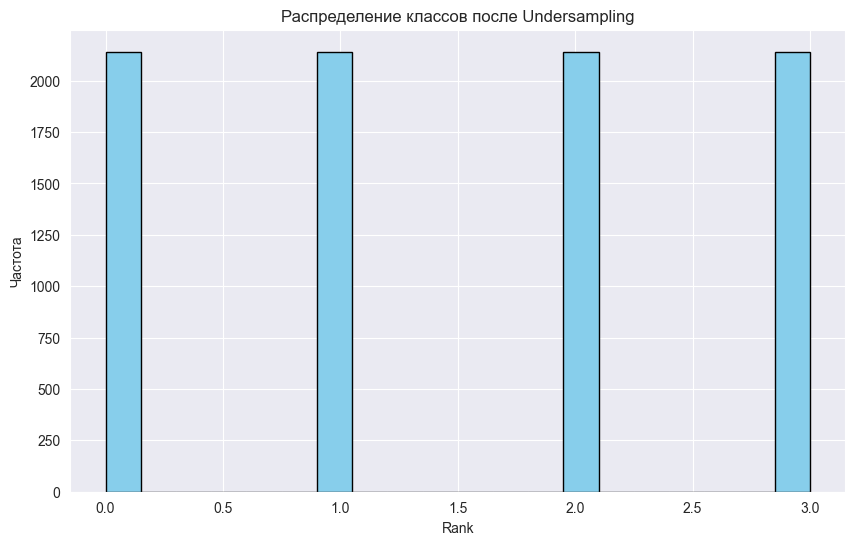

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(y_resamp_rus, bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение классов после Undersampling')
plt.xlabel('Rank')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

In [33]:
(y_resamp_rus.value_counts)

<bound method IndexOpsMixin.value_counts of 187321    0
158599    0
55429     0
178586    0
121648    0
         ..
234957    3
235072    3
235095    3
235131    3
235203    3
Name: rank, Length: 8564, dtype: int64>

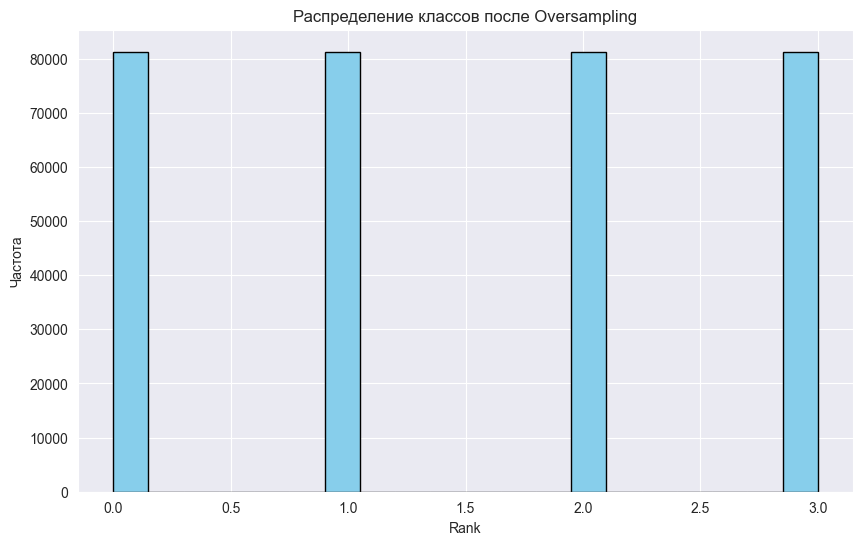

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(y_resamp_ros, bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение классов после Oversampling')
plt.xlabel('Rank')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

In [35]:
(y_resamp_ros.value_counts)

<bound method IndexOpsMixin.value_counts of 0         1
1         0
2         1
3         1
4         0
         ..
325059    3
325060    3
325061    3
325062    3
325063    3
Name: rank, Length: 325064, dtype: int64>

# Обучающая и тестовая выборки

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_resamp_ros, y_resamp_ros, test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [147998, 325064]

Поскольку при Oversampling количество признаков в X не увеличивется до 325064, как в y, то этот метод и его результаты далее мы использовать не будем.

In [40]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_resamp_rus, y_resamp_rus, test_size=0.2, random_state=42)

In [41]:
X_train_rus

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,query_id
154309,-0.737015,-0.356135,-1.147138,-0.695715,-0.797721,-0.894132,-0.36671,-1.288596,0.540109,-1.077703,...,-0.003950,-0.697956,-1.743476,-0.721658,-0.718582,-0.748913,-0.126741,-0.274031,-0.492103,19075
213209,0.071150,-0.356135,0.781073,-0.695715,0.033167,0.576653,-0.36671,1.092516,1.407393,0.531247,...,-0.003950,-0.697956,0.712035,0.438608,-0.718582,-0.140978,-0.124825,0.259655,0.692785,26365
89440,0.879315,-0.356135,0.781073,-0.695715,0.864056,0.576653,-0.36671,0.298813,-0.415067,0.531247,...,-0.003950,-0.697956,0.727733,0.502677,-0.718582,-0.622409,-0.128177,-0.117064,-0.317855,11770
222075,-1.545180,-0.356135,-1.147138,-0.695715,-1.628610,-2.364918,-0.36671,-1.288596,1.537943,-2.686653,...,-0.003950,-0.697956,-2.099523,-0.721658,-0.718582,-0.810561,-0.128656,-0.352514,-0.666352,27775
31192,-0.737015,-0.356135,-1.147138,-0.695715,-0.797721,0.576653,-0.36671,-1.288596,-1.272751,0.531247,...,-0.003950,-0.697956,0.734952,-0.721658,-0.718582,-0.756619,-0.128656,-0.336817,-0.596652,4300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153755,0.071150,-0.356135,-0.183032,0.568595,0.033167,0.576653,-0.36671,-0.098040,0.531952,0.531247,...,-0.003950,0.405205,0.211634,-0.237044,0.556642,-0.404542,-0.101356,0.243959,0.657935,19015
191632,0.879315,-0.356135,0.781073,0.568595,0.864056,0.576653,-0.36671,0.298813,1.089679,0.531247,...,-0.003950,0.294890,0.493832,0.173243,0.131566,-0.640849,-0.126741,0.039902,-0.085524,22990
113782,0.879315,-0.356135,1.745178,-0.695715,0.864056,0.576653,-0.36671,1.092516,-0.056639,0.531247,...,-0.003950,-0.697956,0.625244,0.925401,-0.718582,-0.687805,-0.128177,-0.289727,-0.573419,14545
48116,0.879315,-0.356135,-0.183032,-0.695715,0.864056,0.576653,-0.36671,-0.494892,-1.023550,0.531247,...,-0.003950,-0.697956,0.712418,-0.003362,-0.718582,-0.025328,-0.080283,0.730555,0.936732,6730
